<a href="https://colab.research.google.com/github/thedatadj/Machine-Learning/blob/main/Fraud%20Detection/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection
In this project, I try to detect fraudulent credit cart transactions.

I build a one-class SVM Model to predict whether or not a transaction is fraudulent.

## Import libraries

In [2]:
# For scientific computing
import pandas as pd
import numpy as np
from numpy import quantile, where, random

# For visualizations
import matplotlib.pyplot as plt

# Dataset Description
The dataset contains credit card transactions of european casholders.

The data can be found at the following url:

[Credit Card Fraud Detection Dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Features V1, V2, .....V28 are the results of PCA dimensionality reduction to protect the user identities and sensitive informations.Time columns contains the seconds elapsed between each transaction and the amount column represent the transaction amount.

- **Class:** It is the response variable and has the value either 1 or 0 for each class.

For practise, I will be using only six features. V1,...V5 representing information and the class features.

## Download dataset

In [3]:
# Upload your kaggle token
from google.colab import files
files.upload()

# Save it
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the data
import zipfile
zip_ref = zipfile.ZipFile('/content/creditcardfraud.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Saving kaggle.json to kaggle.json
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


## Import dataset

In [4]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'Class']

data = pd.read_csv("/content/creditcard.csv",
                   skipinitialspace = True,
                   usecols = columns)

## Exploratory data analysis
Now, I will explore the data to understand it more.

In [5]:
# How many rows and columns does the data has?

print("There are {} rows and {} columns".format(data.shape[0], data.shape[1]))

data.head()

There are 284807 rows and 6 columns


,V1,V2,V3,V4,V5,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0


We have 284,807 credit card transactions. Each transaction has 5 attributes and 1 class which is the target variable.

In [6]:
# Does this dataset contains missing values?

data.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
Class    False
dtype: bool

There is no missing data in this dataset.

<Axes: title={'center': 'Distribution of Transactions by Class'}>

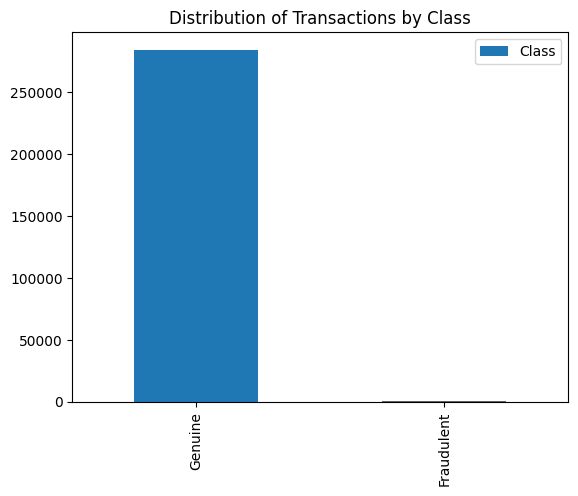

In [7]:
# How many transaction are fraudulent or genuine?

distribution = pd.DataFrame(data.Class.value_counts())
distribution = distribution.rename({0: 'Genuine',
                                    1: 'Fraudulent'}, axis=0)
distribution.plot(kind='bar',
                  title='Distribution of Transactions by Class',)

I am going to train the SVM model of the majority class (Genuine).

So, I am going to extract and store the transactios of the positive class (Genuine) into a dataframe.

In [8]:
# Genuine dataset
genuine_data = data[data.Class == 0]

# Fraudulent dataset
fraud_data = data[data.Class == 1]

# Training, validation, and testing sets.

I am going to split the `genuine_data` into training and validation set

In [9]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(genuine_data,
                                          test_size = 0.2,
                                          random_state = 0)

The test data is going to be a combination of the validation genuine data and the fraud data.

In [10]:
test_data = pd.concat([valid_data, fraud_data])

# The model

## Training
I calculate the `nu` parameter and train a one-class SVM with rbf kernel on a subset the genuine data.

In [11]:
from sklearn.svm import OneClassSVM

# Calculate nu value
f = fraud_data.shape[0] # size of the fraud sample
g = genuine_data.shape[0] # size of the genuine sample

nu = f/g

# Model
model = OneClassSVM(nu=nu)

# Training
model.fit(train_data)

OneClassSVM(nu=0.0017304750013189597)

## Predictions
Predict the test data which contains genuine and fradulent transactions.

In [12]:
predictions = model.predict(test_data)


# Results

In [28]:
predictions = pd.DataFrame(predictions)
class_count = pd.DataFrame(predictions.value_counts().values)
class_count = class_count.rename({0: 'Genuine', 1: 'Fraud'}, axis=0)
class_count = class_count.rename({0: 'predictions'}, axis=1)
class_count

,predictions
Genuine,56827
Fraud,528


The fraudulent activity represent 528 out of 56,827 transactions.